# Advance House Prediction EDA

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)

In [60]:
dataset=pd.read_csv('train.txt')
dataset.head()
len(dataset.columns)

81

In [61]:
dataset.shape

(1460, 81)

<AxesSubplot:>

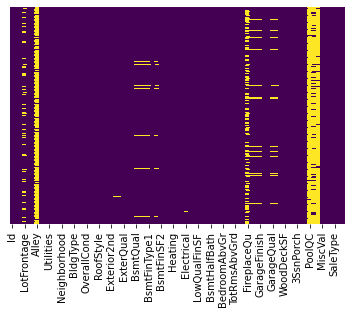

In [62]:
sns.heatmap(dataset.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [63]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
## 2- step print the feature name and the percentage of missing values
nan_features=[feature for feature in dataset.columns if dataset[feature].isnull().sum() > 1]
for feature in nan_features:
    print(feature,np.round(dataset[feature].isnull().mean(),4))

LotFrontage 0.1774
Alley 0.9377
MasVnrType 0.0055
MasVnrArea 0.0055
BsmtQual 0.0253
BsmtCond 0.0253
BsmtExposure 0.026
BsmtFinType1 0.0253
BsmtFinType2 0.026
FireplaceQu 0.4726
GarageType 0.0555
GarageYrBlt 0.0555
GarageFinish 0.0555
GarageQual 0.0555
GarageCond 0.0555
PoolQC 0.9952
Fence 0.8075
MiscFeature 0.963


### Since they are many missing values, we need to find the relationship between missing values and Sales Price

Let's plot some diagram for this relationship

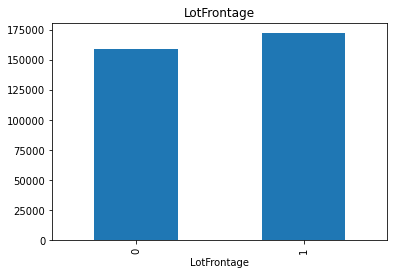

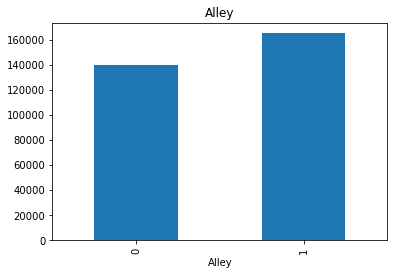

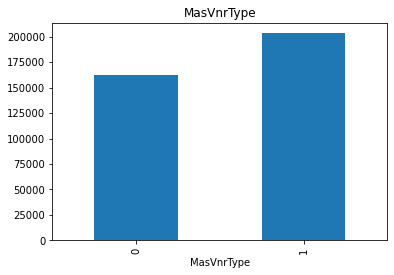

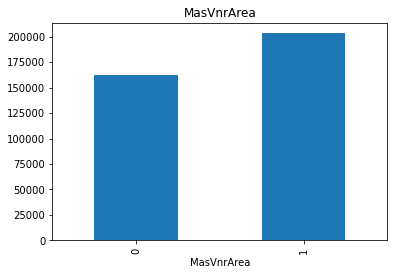

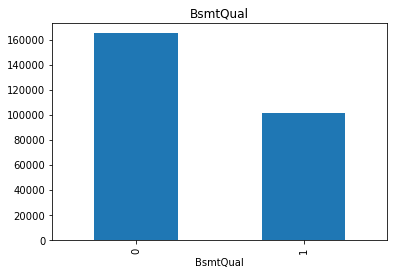

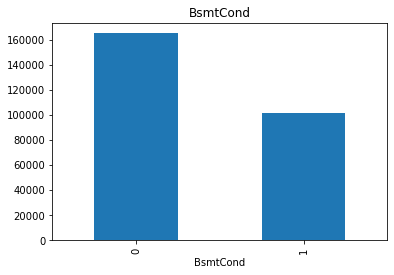

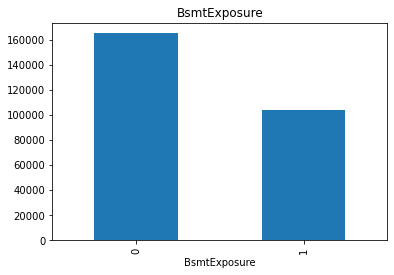

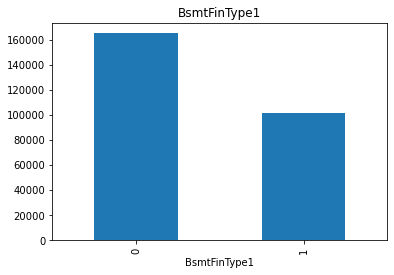

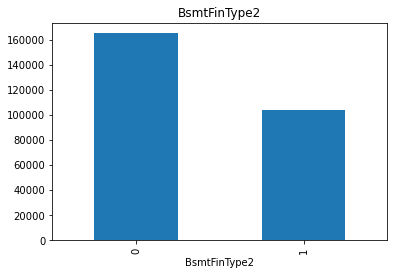

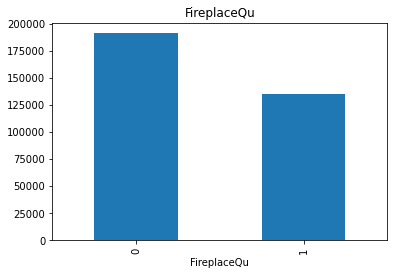

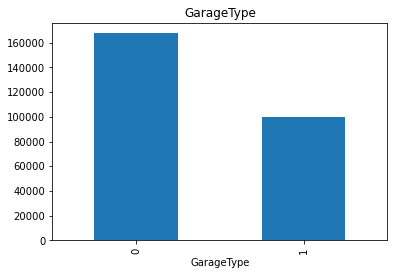

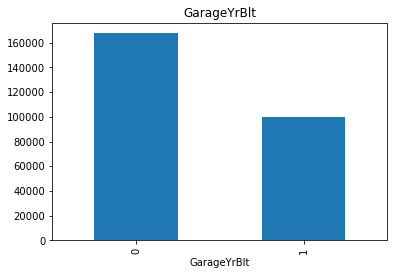

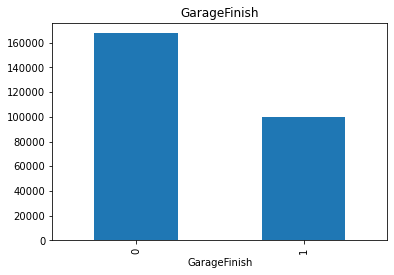

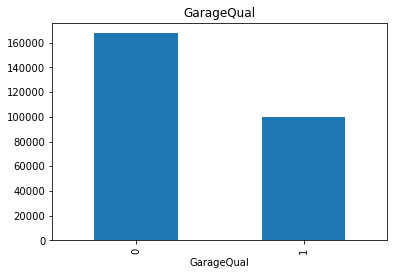

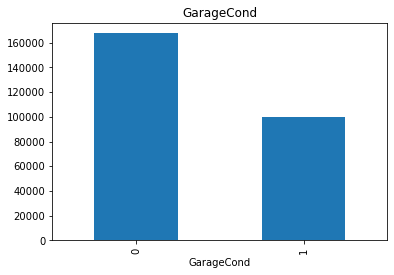

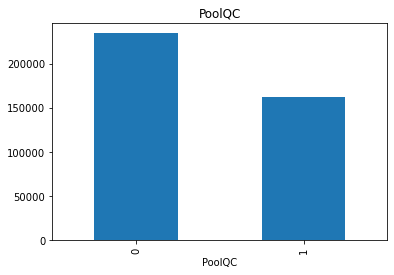

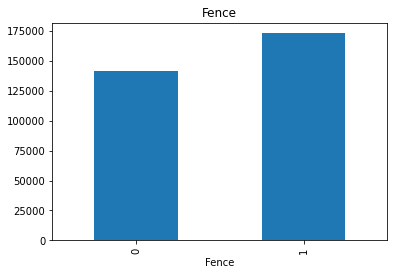

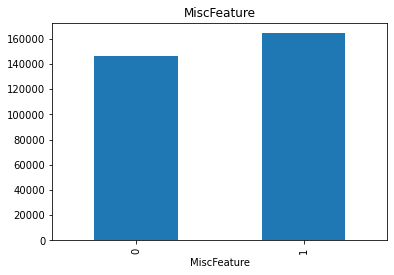

In [64]:
for i in nan_features:
    data=dataset.copy()
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[i]=np.where(data[i].isnull(),1,0)
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(i)['SalePrice'].median().plot.bar()
    plt.title(i)
    plt.show()

Here with the relation between the missing values and the dependent variable is clearly visible.So,it is seen that NAN values play a role in Sale Price so we need to replace these nan values with something meaningful.

In [65]:
print('The count of ID\'s is',format(len(dataset.Id)))

The count of ID's is 1460


### Numerical Features

In [66]:
#We need to find out numerical features
numerical_feature= [features for features in dataset.columns if dataset[features].dtype !='O']
print('Length of numerical features is', len(numerical_feature))
dataset[numerical_feature].head()

Length of numerical features is 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


#### Temporary Variables(Eg: Date-time Variables)

After going through the features it is seen that the dataset has 4 year variables. We have to extract information from the datetime variables like number of years or number of days. One example in this specific scenario can be difference in years between the year the house was built and the year the house was sold. 

In [67]:
# list of variables that contain year information
year_feature=[feature for feature in numerical_feature  if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [68]:
# let's explore the content of these year variables
for feature in year_feature:
   print(feature,dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'House Price vs YearSold')

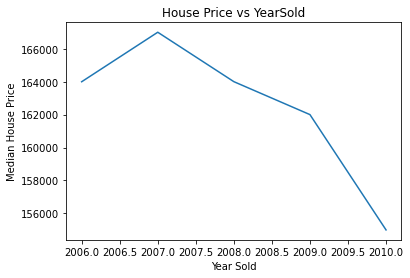

In [69]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")




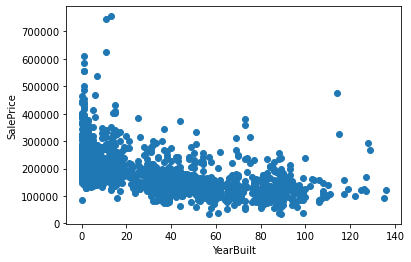

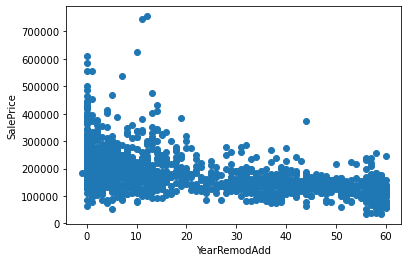

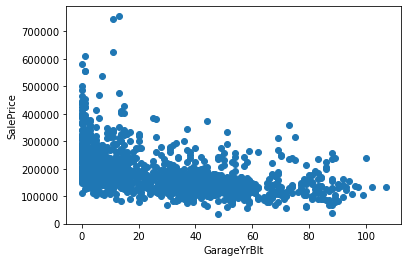

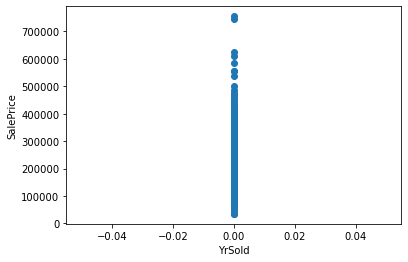

In [70]:
## Here we will compare the difference between All years feature with SalePrice
for feature in year_feature:
        data=dataset.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()
        



### Numerical variables are usually of 2 type
#### *1. Discrete variable* 


In [71]:
discrete_feature=[feature for feature in numerical_feature if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print('Discrete Variables Count:{}'.format(len(discrete_feature)))


Discrete Variables Count:17


In [72]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [73]:
#There is no null value in discrete feature
dataset[discrete_feature].isnull().sum()

MSSubClass      0
OverallQual     0
OverallCond     0
LowQualFinSF    0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageCars      0
3SsnPorch       0
PoolArea        0
MiscVal         0
MoSold          0
dtype: int64

In [74]:
dataset[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


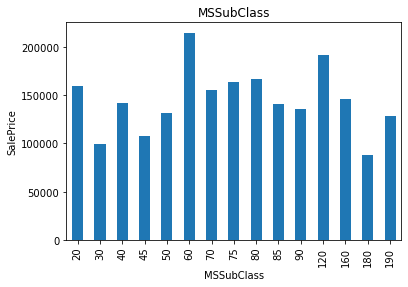

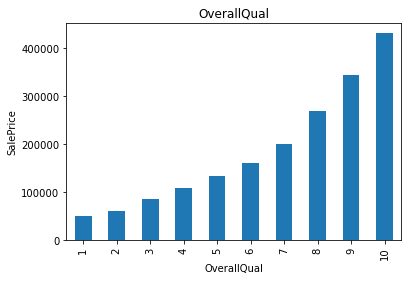

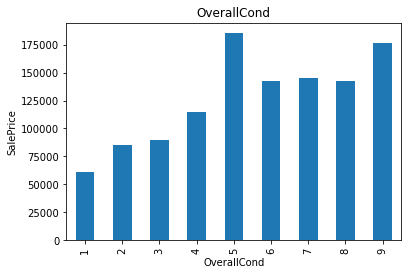

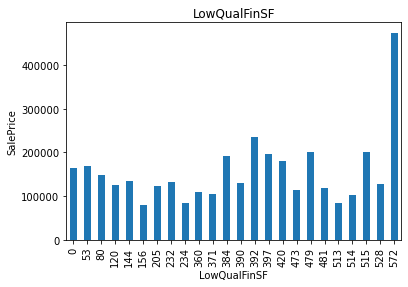

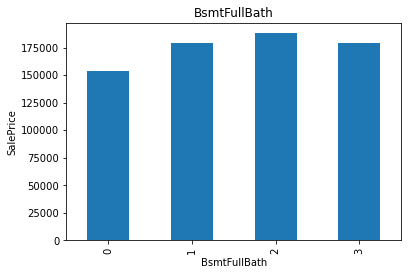

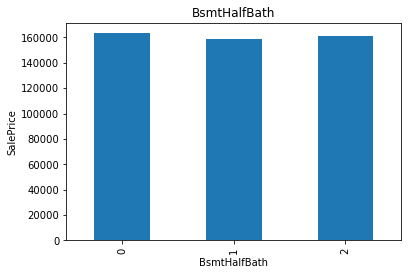

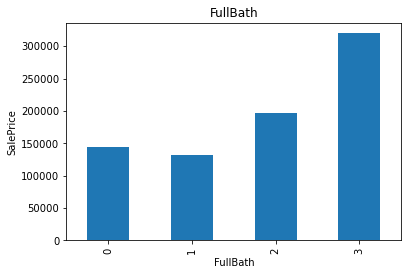

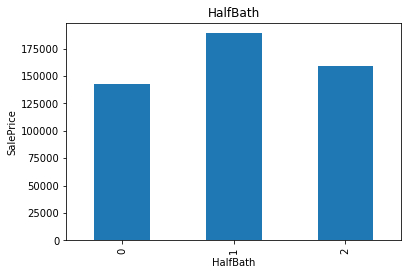

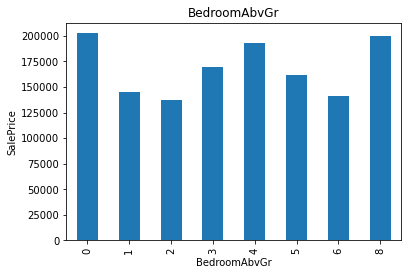

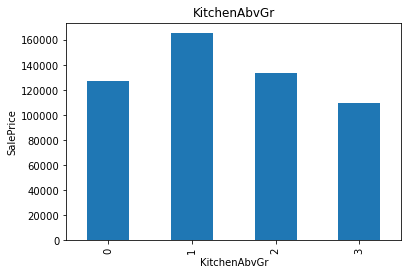

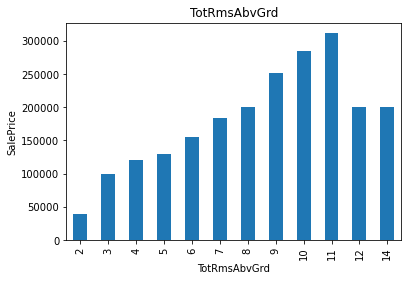

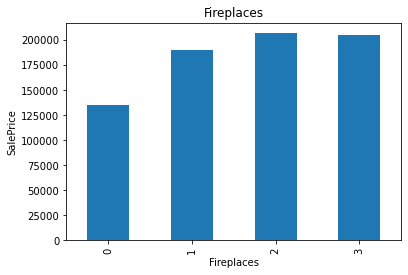

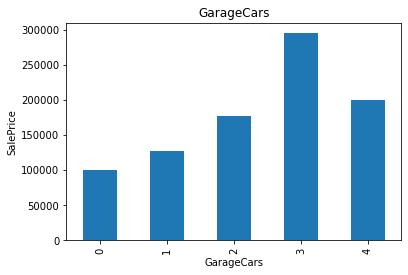

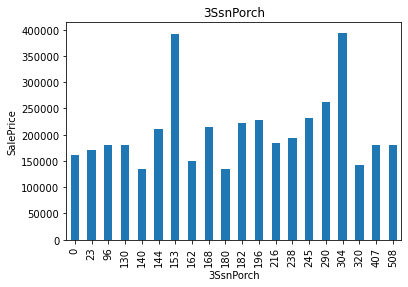

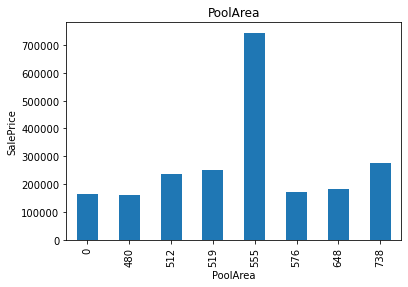

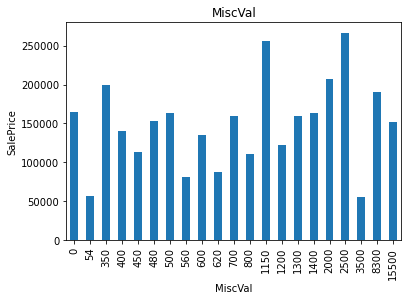

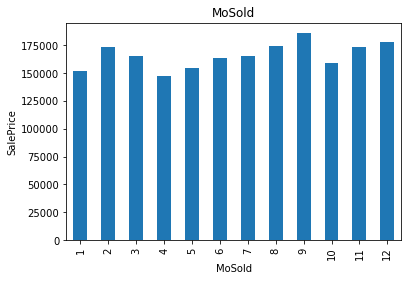

In [75]:
#Finding relationship between Discrete feature and Sale price
for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [76]:
## There is some relation between varaible number and sale price

#### *2. Continous variable* 

In [77]:
continious_feature=[feature for  feature in numerical_feature if feature not in discrete_feature +year_feature+['Id']]
print('Continious Variables Count:{}'.format(len(continious_feature)))

Continious Variables Count:16


In [78]:
dataset[continious_feature].isnull().sum()

LotFrontage      259
LotArea            0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
ScreenPorch        0
SalePrice          0
dtype: int64

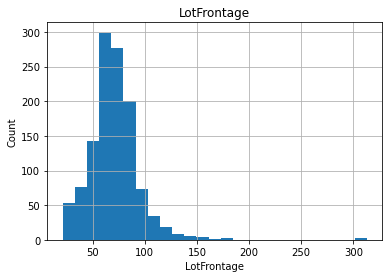

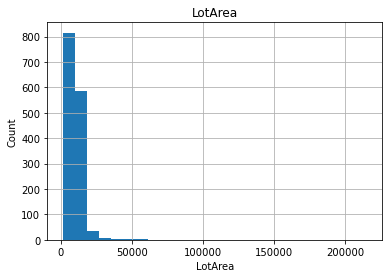

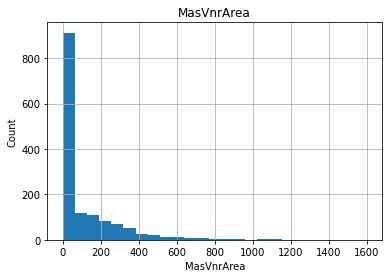

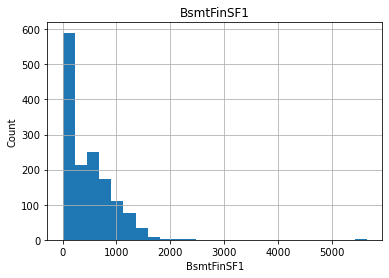

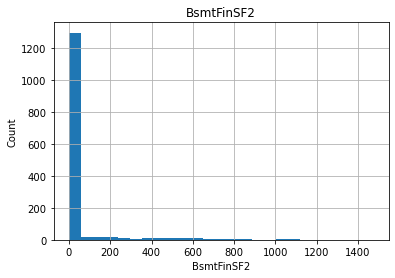

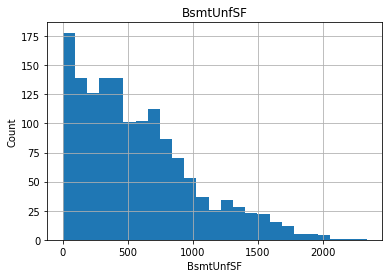

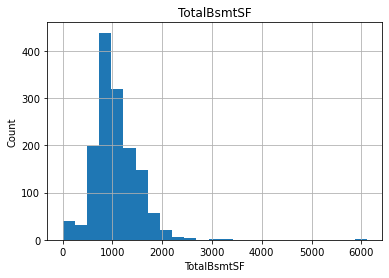

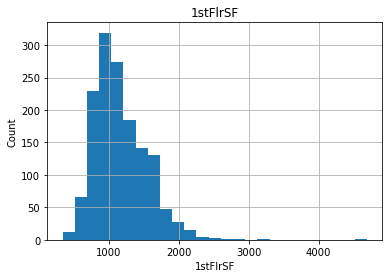

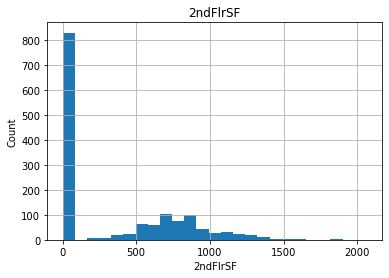

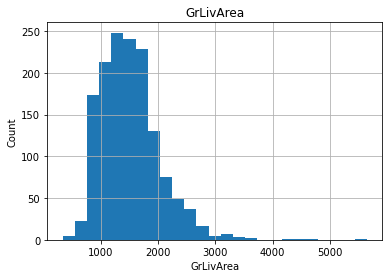

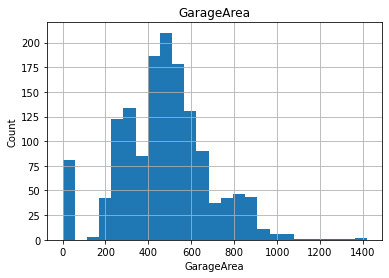

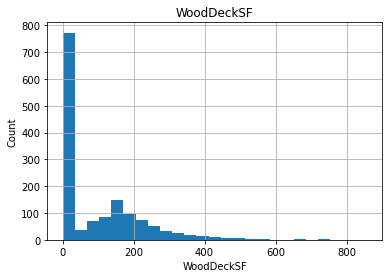

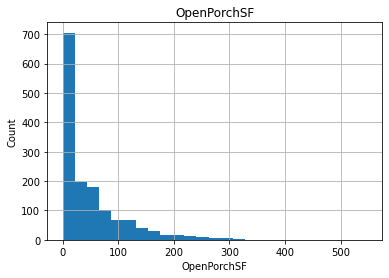

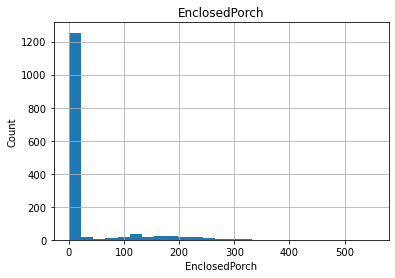

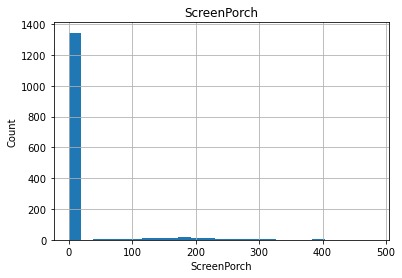

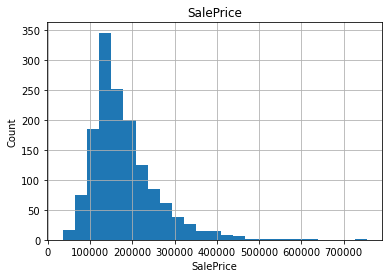

In [79]:
#Finding relationship between Discrete feature and Sale price
for feature in continious_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

* From the histogram it is clear that continuious variable with respect to SalePrince does not follow normal distribution, so now we will transfrom into lognormal distribution.

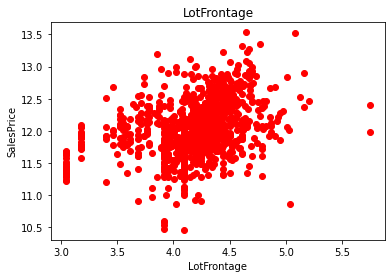

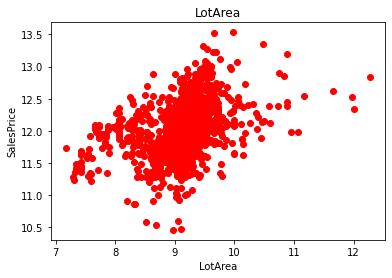

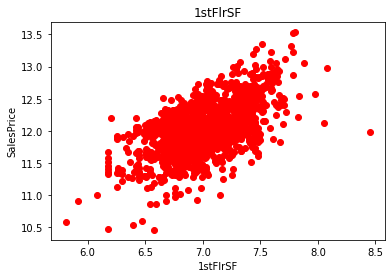

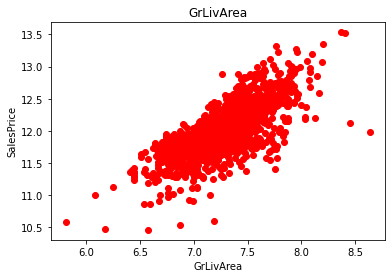

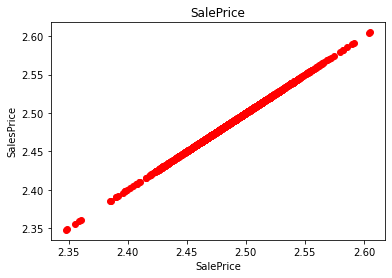

In [80]:
# applying lognormal distribution
for feature in continious_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'],c='red')
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

### Outliers

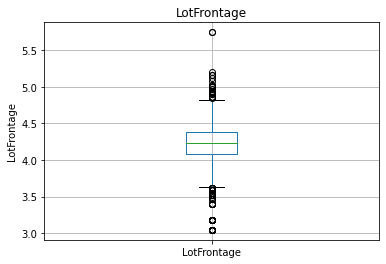

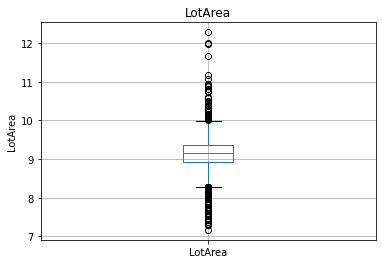

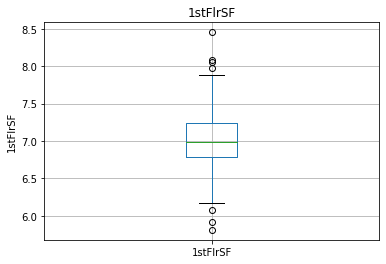

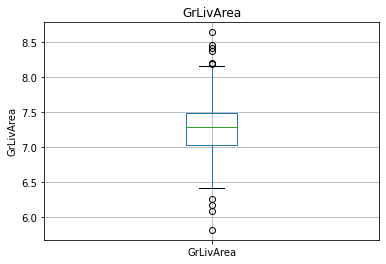

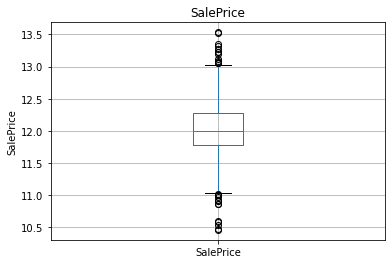

In [81]:
for feature in continious_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [82]:
# We can see that there are many outliers in continiuous feature

### Categorical Features

In [83]:
categorical_feature=[feature for feature in dataset.columns if dataset[feature].dtype=='O']
dataset[categorical_feature].head()


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [84]:
for feature in categorical_feature:
    print('The feature is {} and the count of categories is {}'.format(feature,len(dataset[feature].unique())))

The feature is MSZoning and the count of categories is 5
The feature is Street and the count of categories is 2
The feature is Alley and the count of categories is 3
The feature is LotShape and the count of categories is 4
The feature is LandContour and the count of categories is 4
The feature is Utilities and the count of categories is 2
The feature is LotConfig and the count of categories is 5
The feature is LandSlope and the count of categories is 3
The feature is Neighborhood and the count of categories is 25
The feature is Condition1 and the count of categories is 9
The feature is Condition2 and the count of categories is 8
The feature is BldgType and the count of categories is 5
The feature is HouseStyle and the count of categories is 8
The feature is RoofStyle and the count of categories is 6
The feature is RoofMatl and the count of categories is 8
The feature is Exterior1st and the count of categories is 15
The feature is Exterior2nd and the count of categories is 16
The featur

In [85]:
### Finding out the relationship between categorical variable and dependent feature SalesPrice

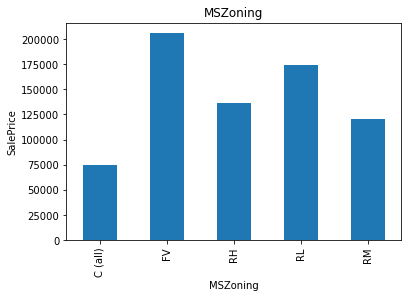

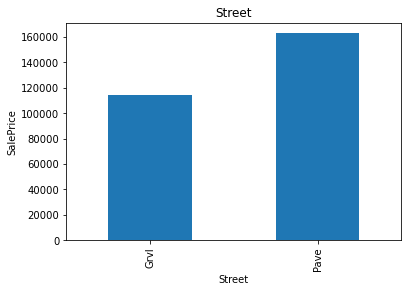

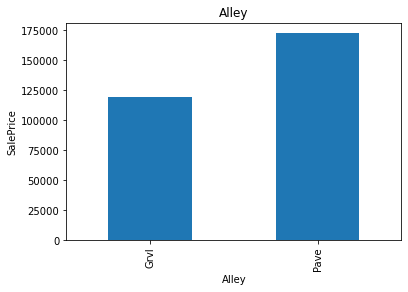

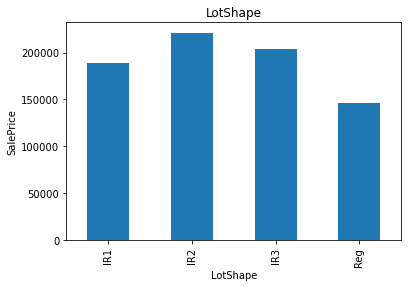

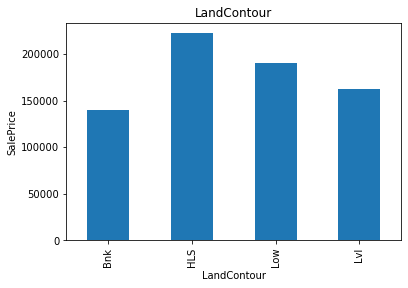

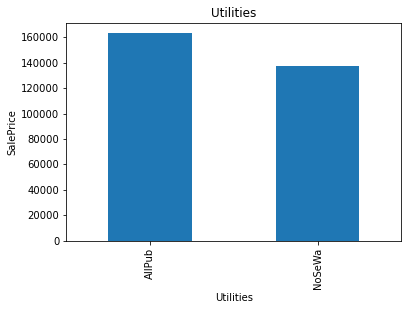

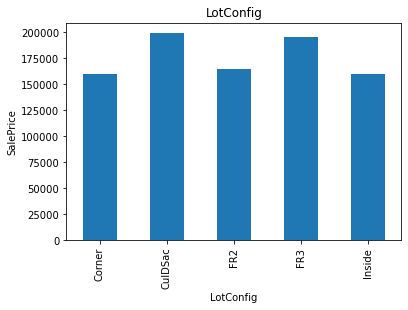

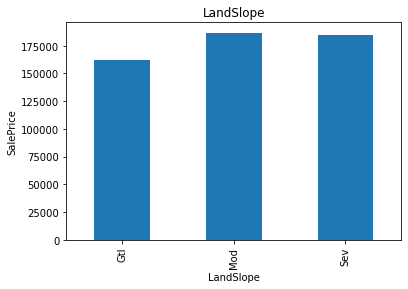

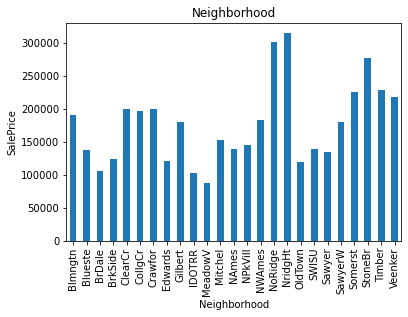

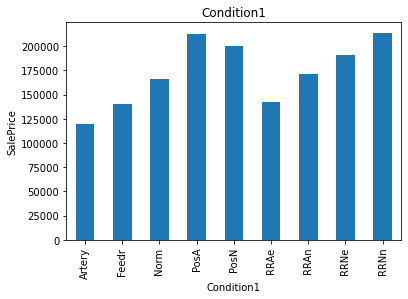

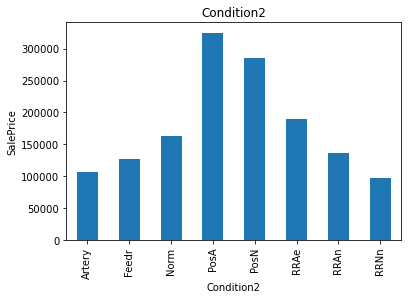

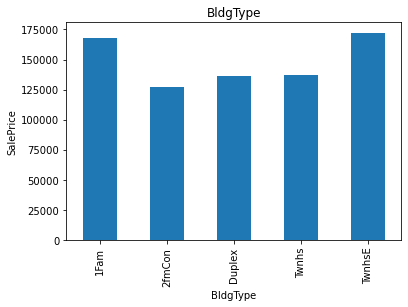

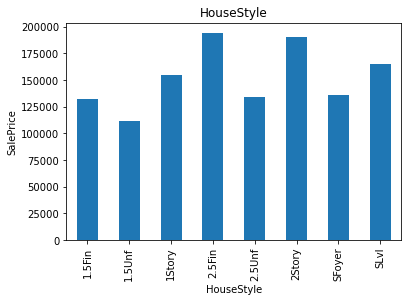

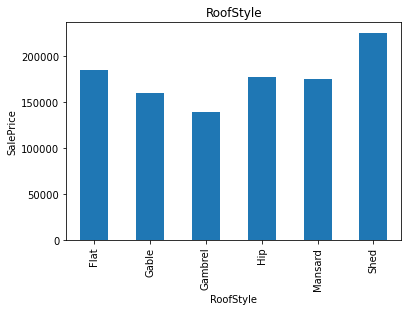

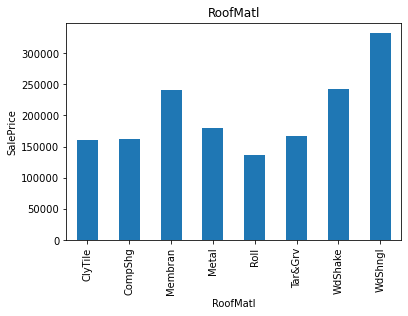

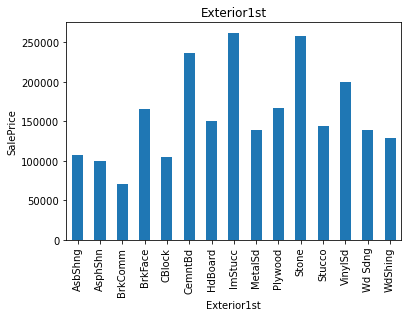

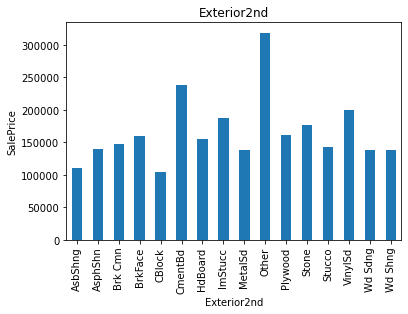

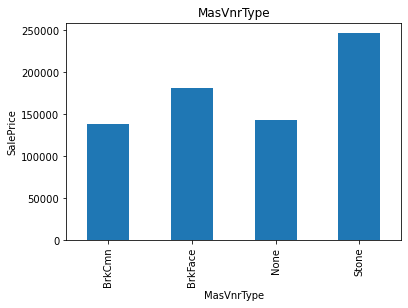

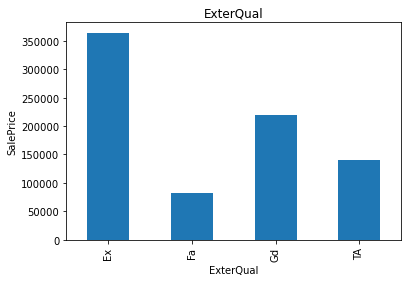

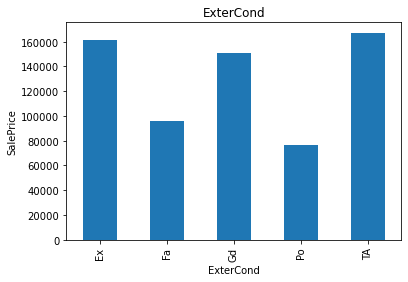

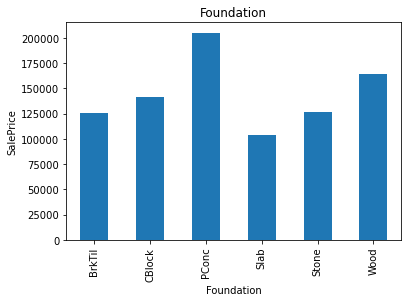

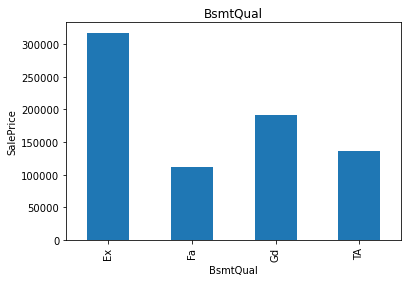

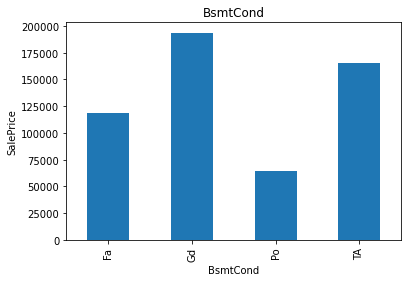

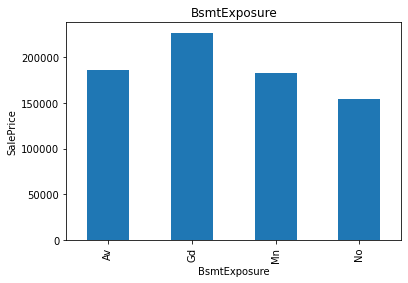

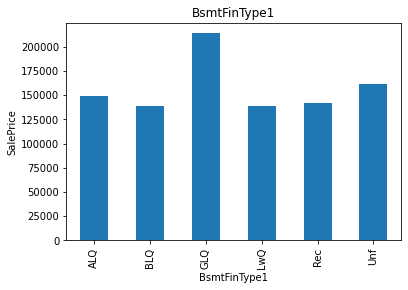

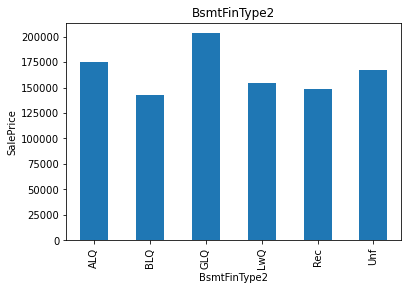

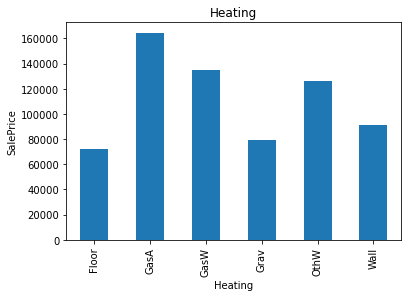

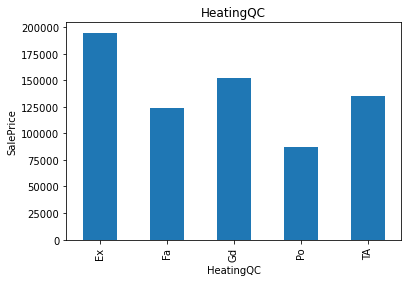

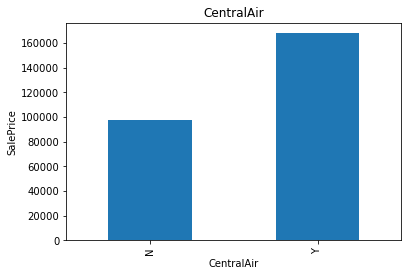

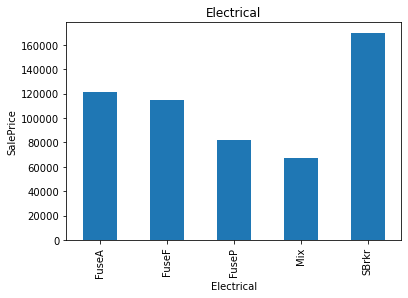

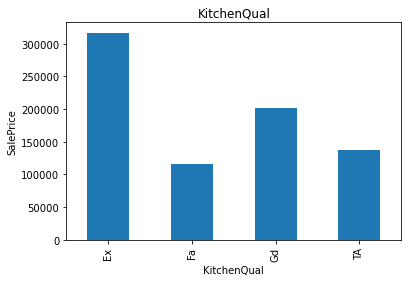

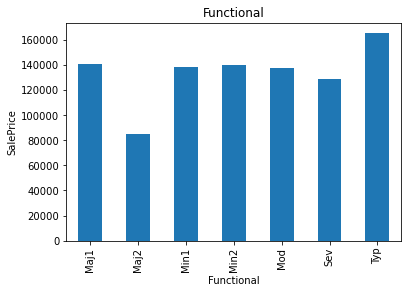

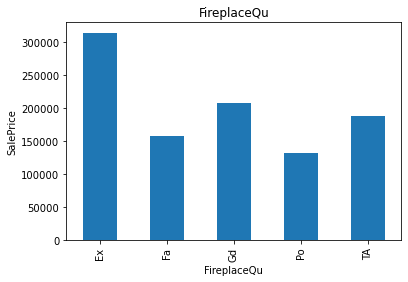

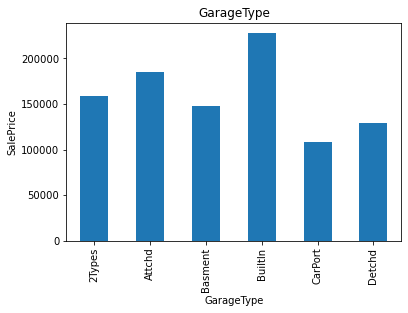

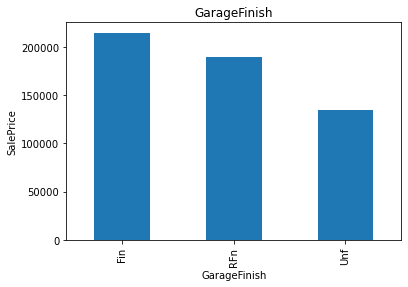

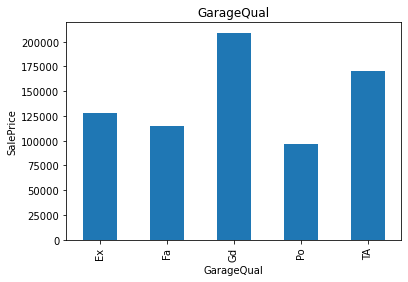

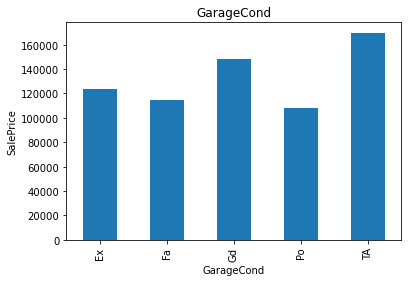

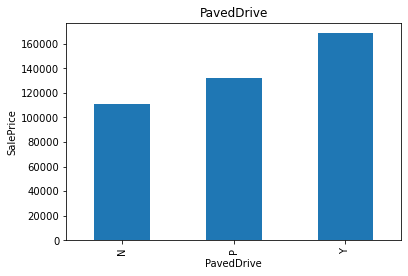

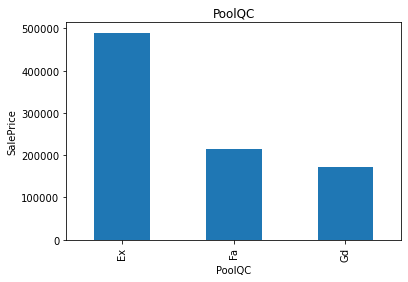

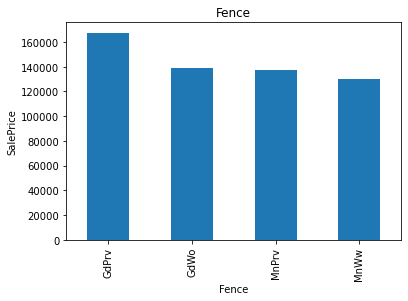

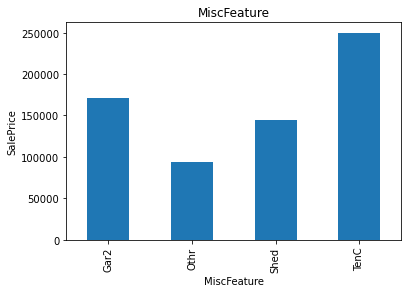

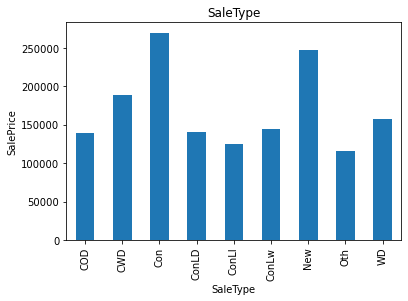

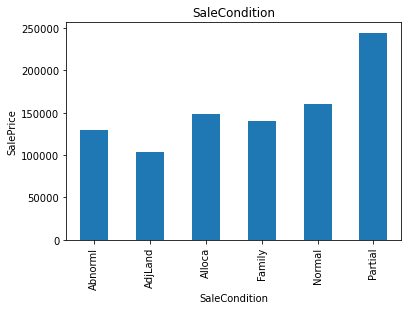

In [86]:
for feature in categorical_feature:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

## Feature Engineering
We will be performing all the below steps in Feature Engineering

1. Missing values
2. Temporal variables
3. Categorical variables: remove rare labels
4. Standarise the values of the variables to the same range

In [87]:
dataset[categorical_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [88]:
## Finding missing value in categorical feature
dataset[categorical_feature].isnull().sum().sort_values(ascending=False)
len(dataset.columns)

81

In [89]:

## defining a function to replace nan values with new missing label
def impute_cat_feature(dataset,categorical_feature):
    data=dataset.copy()
    data[categorical_feature]=data[categorical_feature].fillna('Missing')
    return data
    
dataset=impute_cat_feature(dataset,categorical_feature)

In [90]:
## All values are exchanged by missing lablel
dataset[categorical_feature].head()
len(dataset.columns)

81

In [91]:

## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))


LotFrontage: 0.1774% missing value
MasVnrArea: 0.0055% missing value
GarageYrBlt: 0.0555% missing value


In [92]:
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()
    
    ## create a new feature to capture nan values
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    dataset[numerical_with_nan].isnull().sum()

In [93]:
len(dataset.columns)

84

### Temporal Variables (Date Time Variables)


In [94]:
## Gathering insight from temporal variable
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
     
    dataset[feature]=dataset['YrSold']-dataset[feature]

In [95]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [96]:
## The ages gathered with refrence to Year sold
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [97]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


## Handling Rare Categorical Feature

We will remove categorical variables that are present less than 1% of the observations

In [98]:
dataset[categorical_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
1,RL,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
2,RL,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal
3,RL,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Missing,Missing,Missing,WD,Abnorml
4,RL,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,Missing,Missing,WD,Normal


In [99]:
len(categorical_feature)

43

In [100]:
for feature in categorical_feature:
    temp=dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')
    

In [101]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [ ]:
## Now we need to encode categorical feature

In [125]:
#Performing mean encoding
for feature in categorical_feature:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [126]:
dataset[categorical_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,2,0,1,1,0,0,15,4,1,4,5,0,0,9,9,2,2,3,4,3,3,1,6,5,2,4,1,3,2,4,1,4,2,2,3,2,0,4,2,2,3
1,3,1,2,0,1,1,1,0,12,1,1,4,4,0,0,1,2,1,1,3,2,3,3,4,4,5,2,4,1,3,1,4,3,4,2,2,3,2,0,4,2,2,3
2,3,1,2,1,1,1,0,0,15,4,1,4,5,0,0,9,9,2,2,3,4,3,3,2,6,5,2,4,1,3,2,4,3,4,2,2,3,2,0,4,2,2,3
3,3,1,2,1,1,1,2,0,16,4,1,4,5,0,0,2,4,1,1,3,1,2,4,1,4,5,2,3,1,3,2,4,4,2,1,2,3,2,0,4,2,2,0
4,3,1,2,1,1,1,1,0,22,4,1,4,5,0,0,9,9,2,2,3,4,3,3,3,6,5,2,4,1,3,2,4,3,4,2,2,3,2,0,4,2,2,3


C:\Users\Hamzah\anaconda3\lib\site-packages\seaborn\axisgrid.py:1559: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


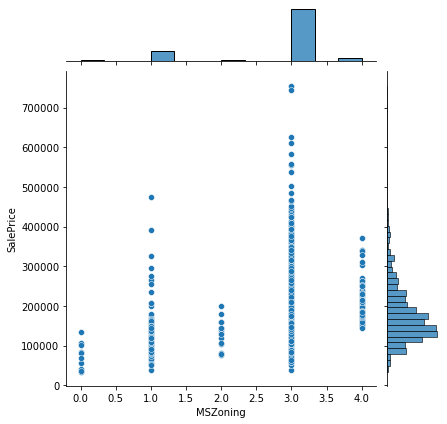

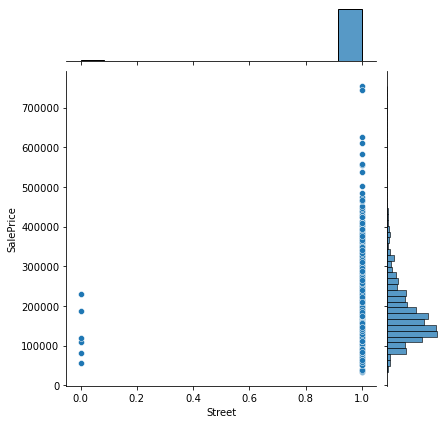

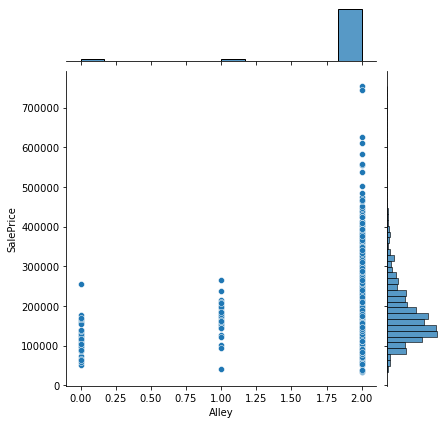

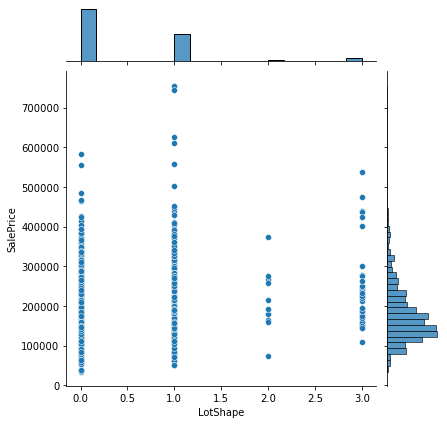

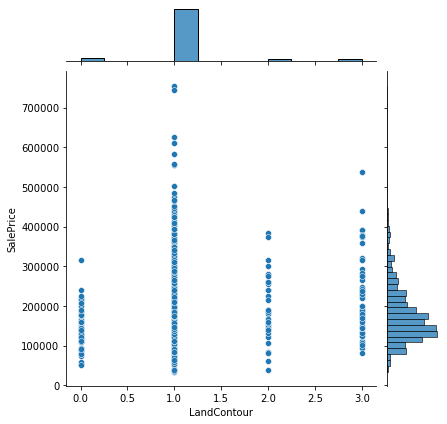

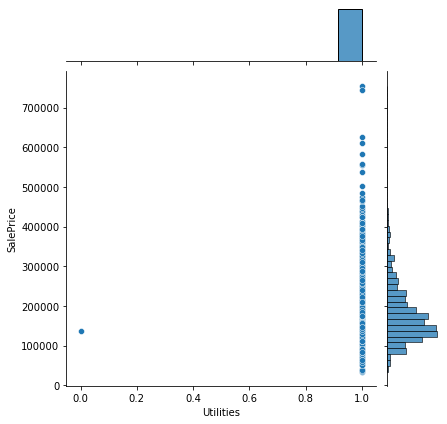

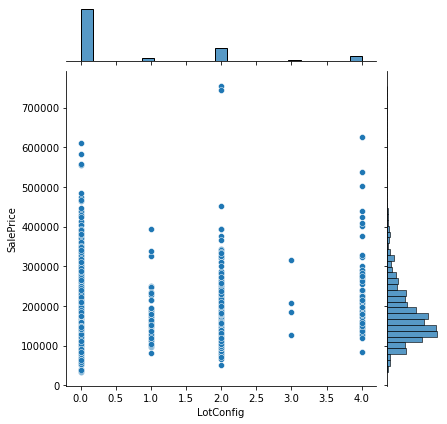

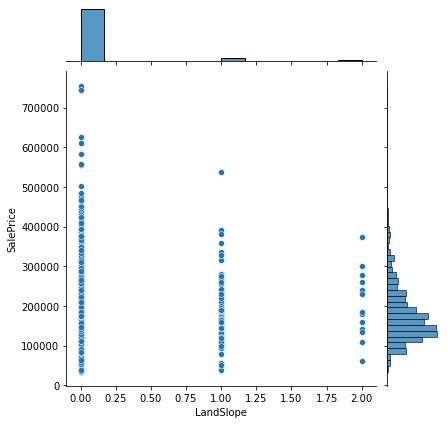

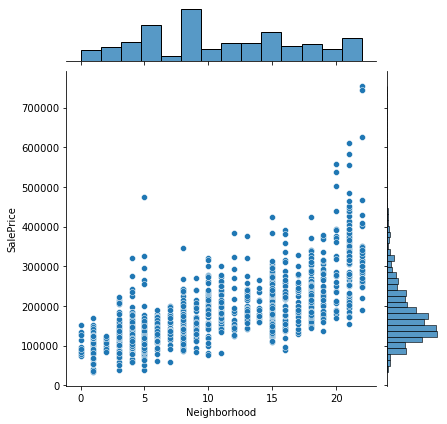

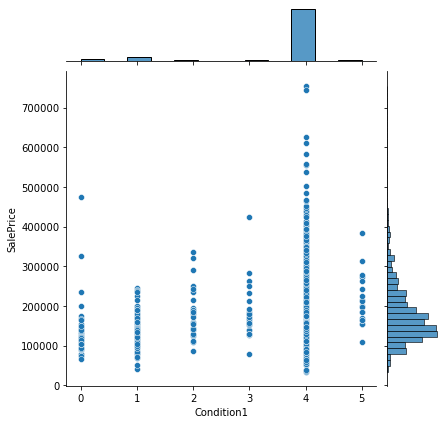

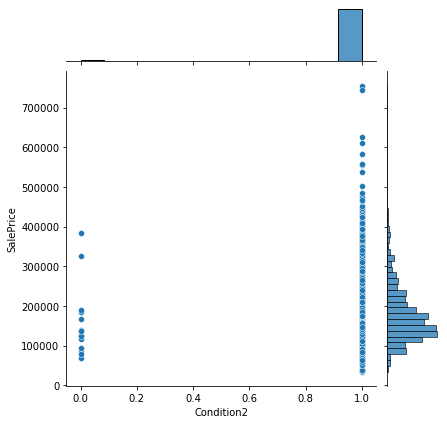

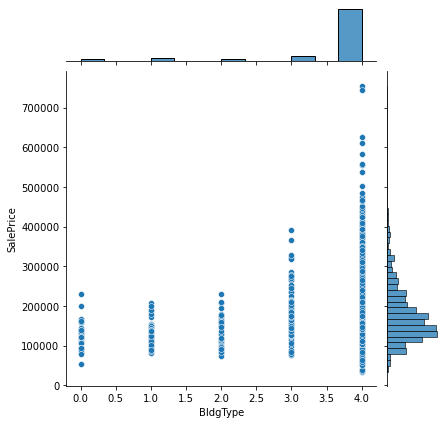

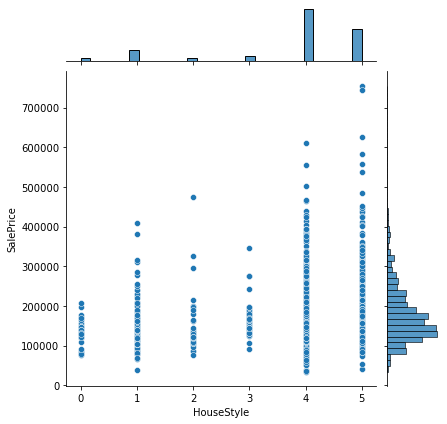

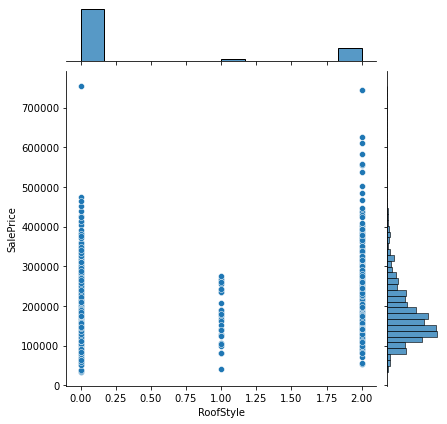

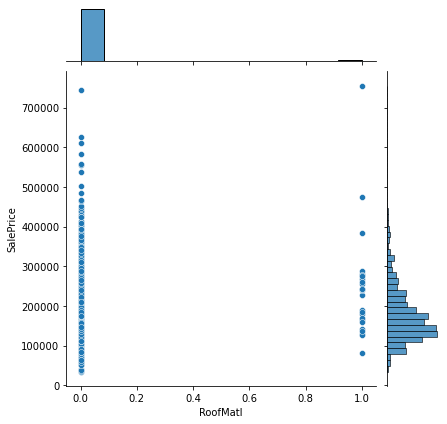

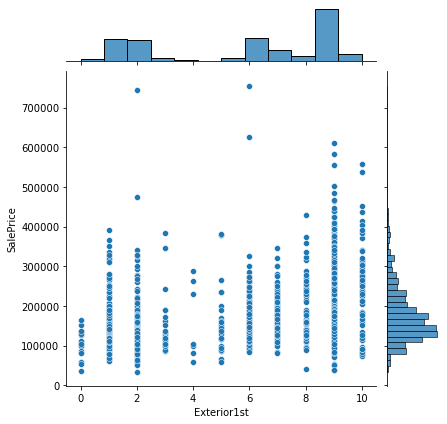

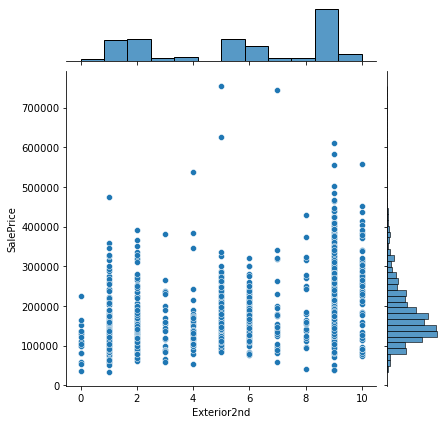

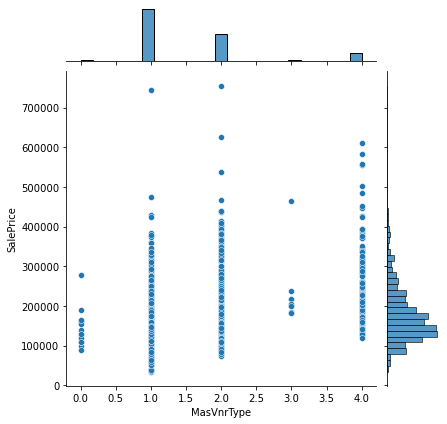

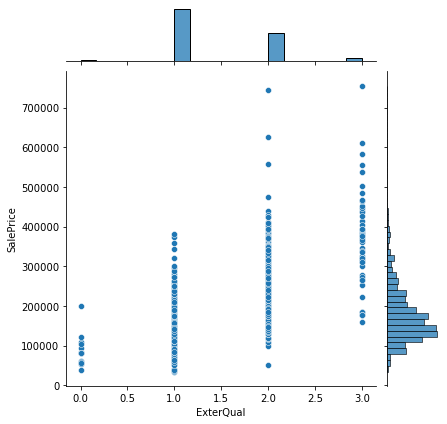

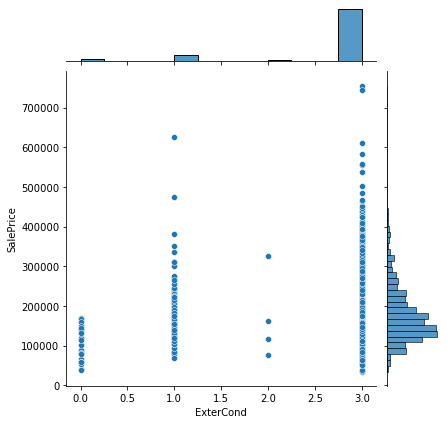

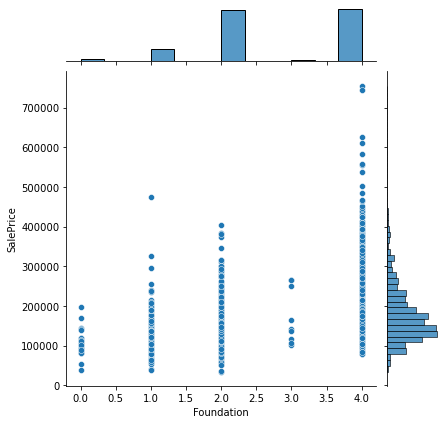

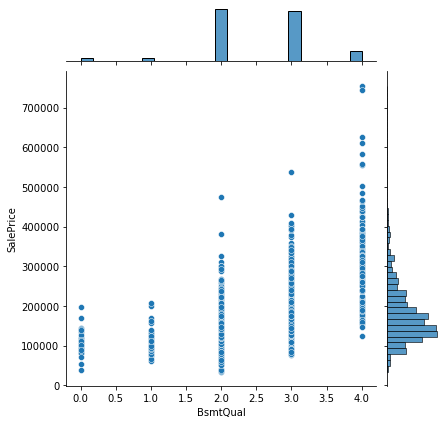

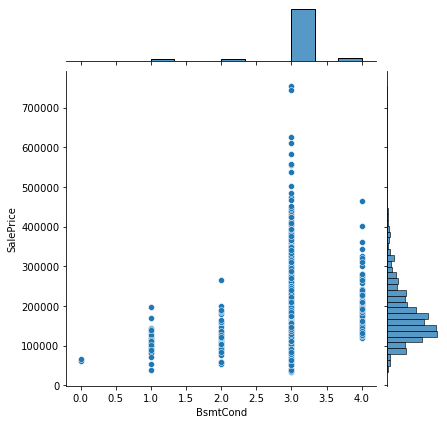

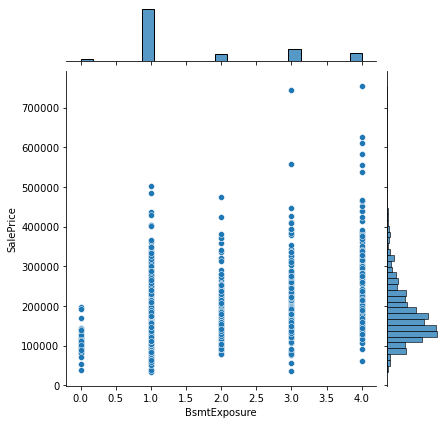

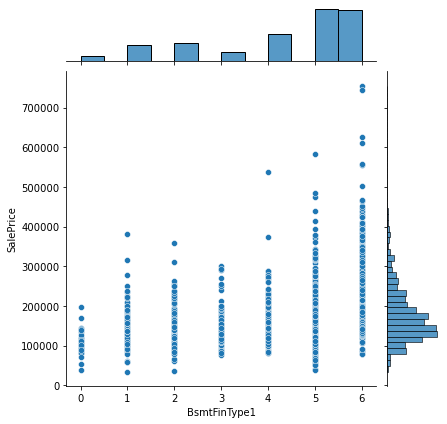

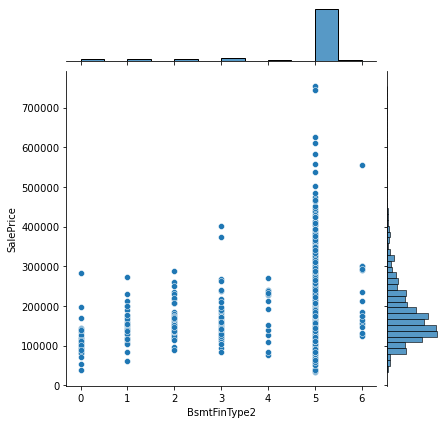

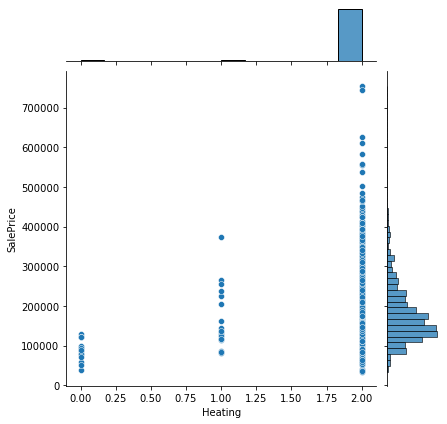

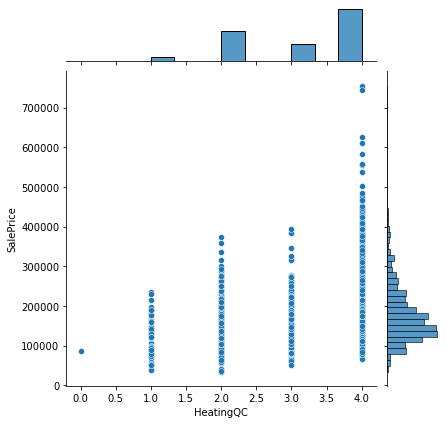

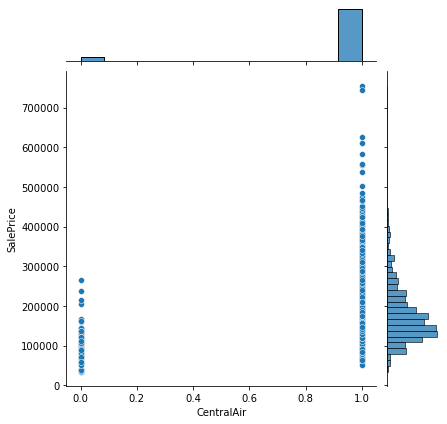

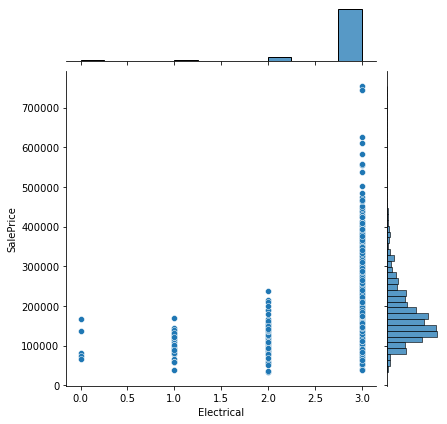

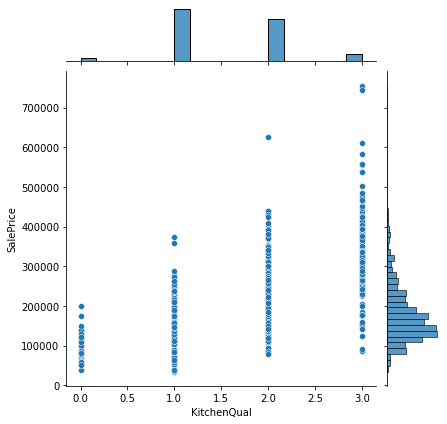

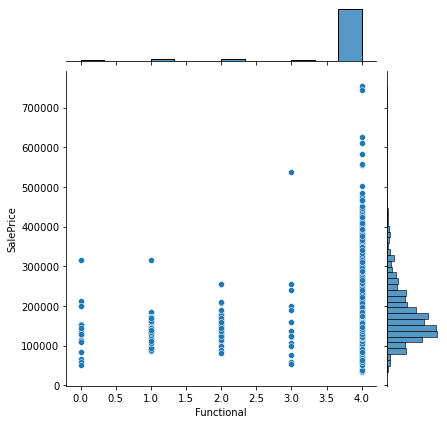

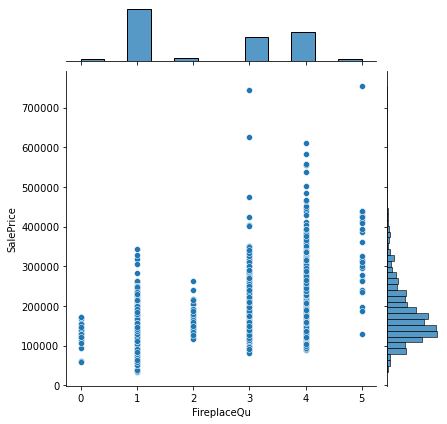

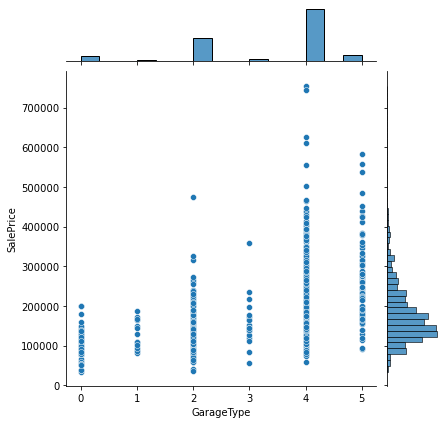

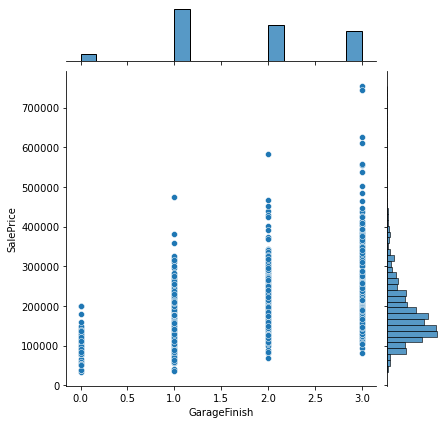

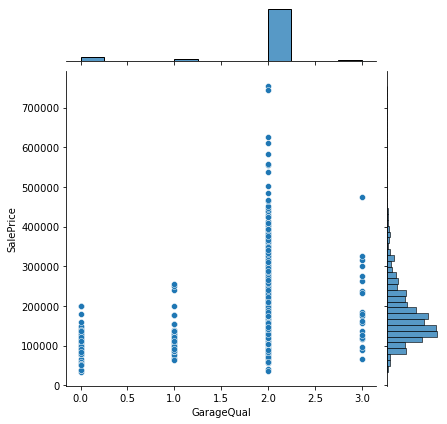

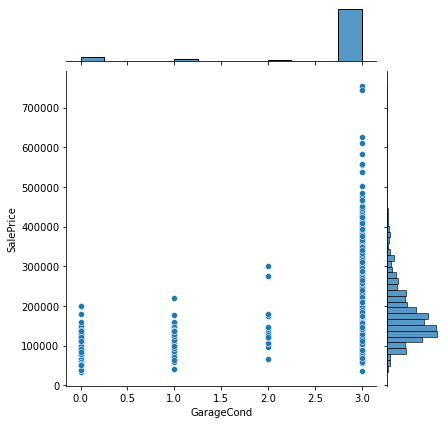

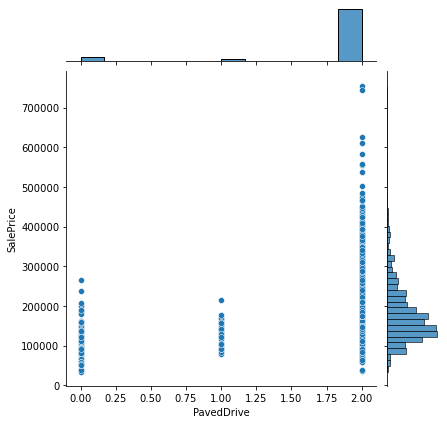

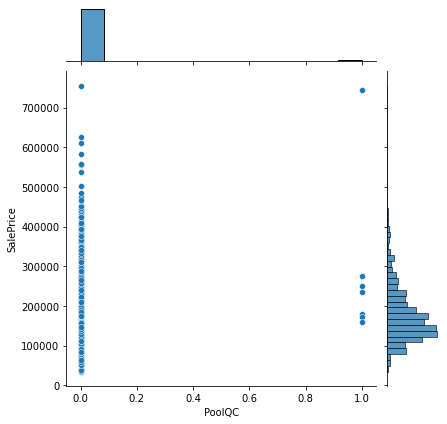

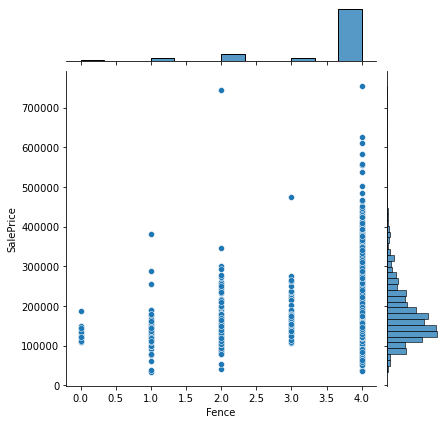

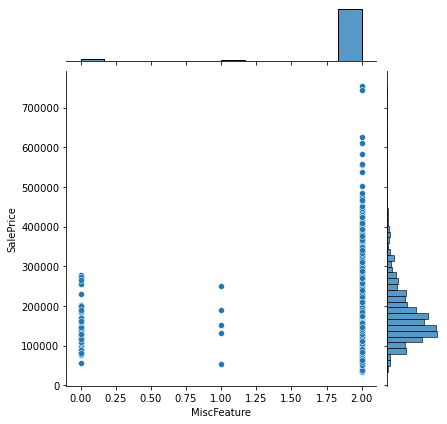

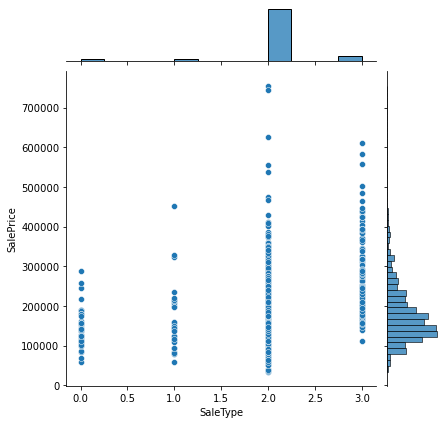

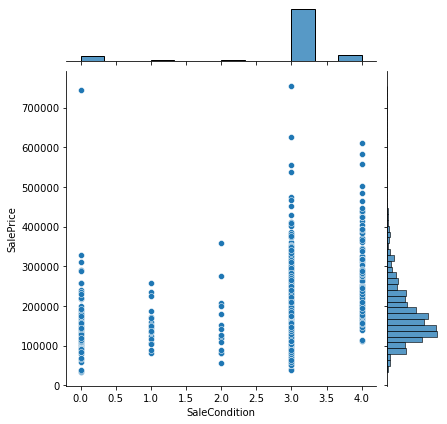

In [134]:
# We can see our categorical features are now in normal distribution
for feature in categorical_feature:
    sns.jointplot(x=feature,y='SalePrice',data=dataset)

In [135]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,3,65.0,8450,1,2,0,1,1,0,0,15,4,1,4,5,7,5,5,5,0,0,9,9,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,856,854,0,1710,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,208500,0,0,0
1,2,20,3,80.0,9600,1,2,0,1,1,1,0,12,1,1,4,4,6,8,31,31,0,0,1,2,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,1262,0,0,1262,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,181500,0,0,0
2,3,60,3,68.0,11250,1,2,1,1,1,0,0,15,4,1,4,5,7,5,7,6,0,0,9,9,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,920,866,0,1786,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,223500,0,0,0
3,4,70,3,60.0,9550,1,2,1,1,1,2,0,16,4,1,4,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,961,756,0,1717,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,140000,0,0,0
4,5,60,3,84.0,14260,1,2,1,1,1,1,0,22,4,1,4,5,8,5,8,8,0,0,9,9,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,1145,1053,0,2198,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,250000,0,0,0


In [138]:
dataset[continious_feature].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


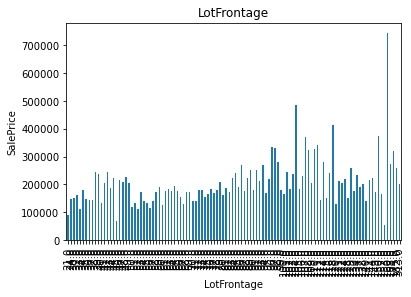

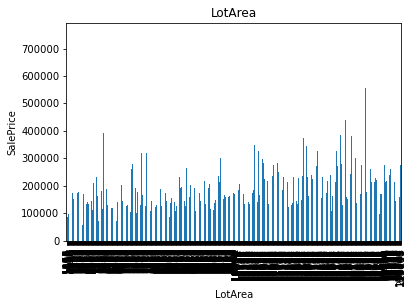

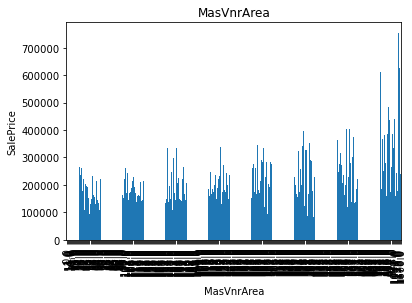

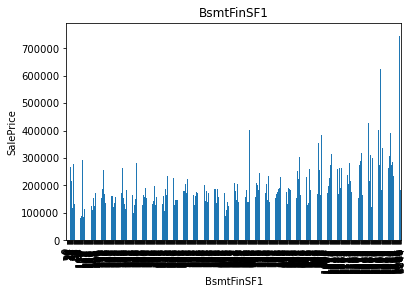

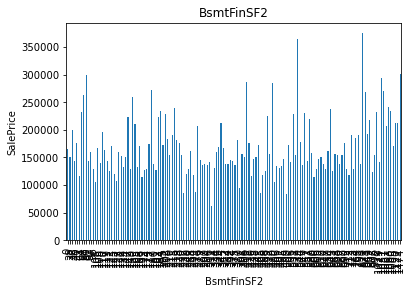

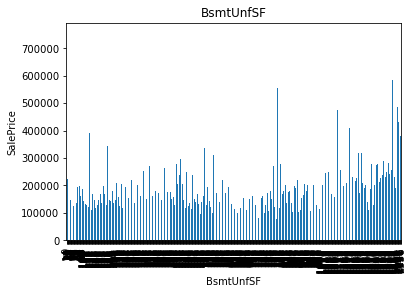

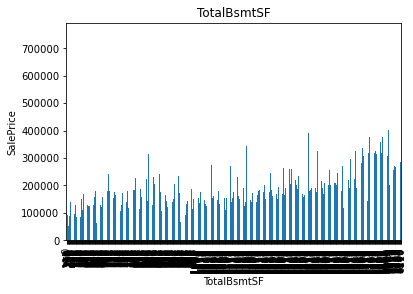

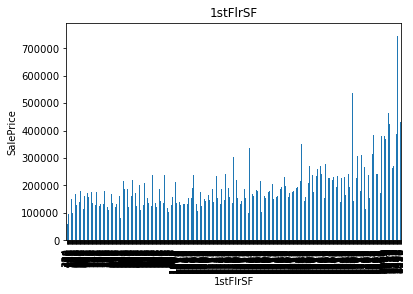

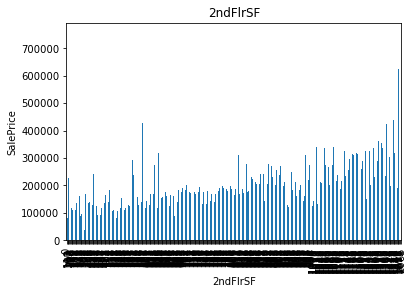

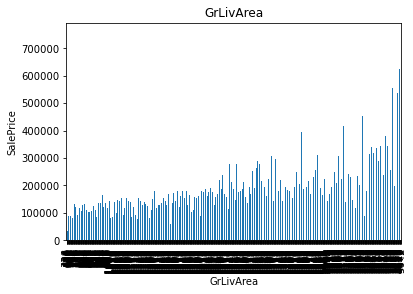

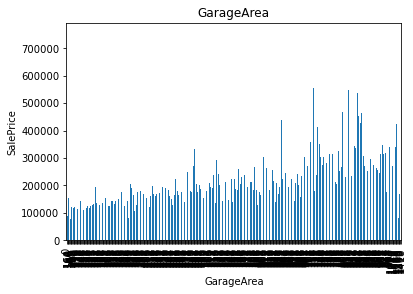

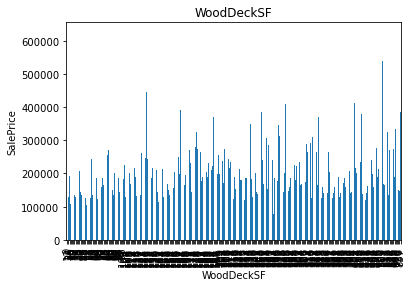

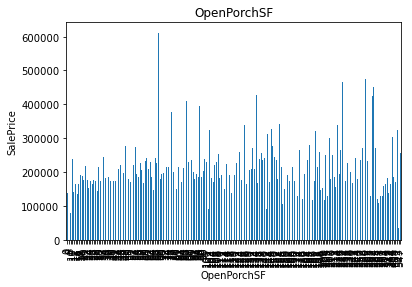

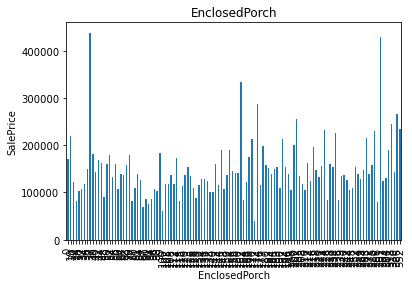

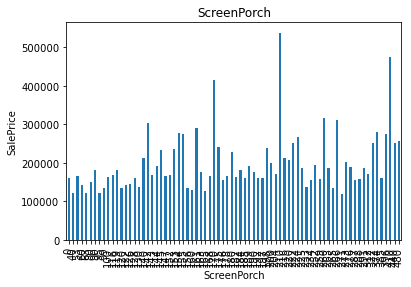

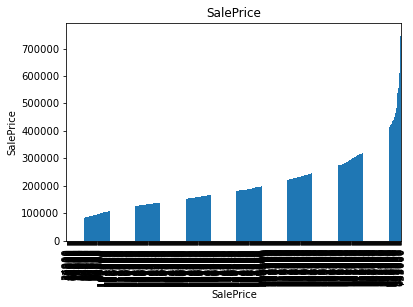

In [139]:
for feature in continious_feature:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [140]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['Id','SalePerice'] ]
len(scaling_feature)

83

In [141]:
scaling_feature

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [142]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,3,65.0,8450,1,2,0,1,1,0,0,15,4,1,4,5,7,5,5,5,0,0,9,9,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,856,854,0,1710,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,208500,0,0,0
1,2,20,3,80.0,9600,1,2,0,1,1,1,0,12,1,1,4,4,6,8,31,31,0,0,1,2,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,1262,0,0,1262,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,181500,0,0,0
2,3,60,3,68.0,11250,1,2,1,1,1,0,0,15,4,1,4,5,7,5,7,6,0,0,9,9,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,920,866,0,1786,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,223500,0,0,0
3,4,70,3,60.0,9550,1,2,1,1,1,2,0,16,4,1,4,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,961,756,0,1717,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,140000,0,0,0
4,5,60,3,84.0,14260,1,2,1,1,1,1,0,22,4,1,4,5,8,5,8,8,0,0,9,9,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,1145,1053,0,2198,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,250000,0,0,0


## Feature Scaling

In [143]:
feature_scale=[feature for feature in dataset.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [144]:
scaler.transform(dataset[feature_scale])

array([[0.23529412, 0.75      , 0.15068493, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.20205479, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.1609589 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.15410959, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.1609589 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.18493151, ..., 0.        , 0.        ,
        0.        ]])

In [145]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([dataset[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [146]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,208500,0.235294,0.75,0.150685,0.033420,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.681818,0.8,1.0,1.0,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,0.9,0.9,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,181500,0.000000,0.75,0.202055,0.038795,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.545455,0.2,1.0,1.0,0.8,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.1,0.2,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,223500,0.235294,0.75,0.160959,0.046507,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.681818,0.8,1.0,1.0,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,0.9,0.9,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,140000,0.294118,0.75,0.133562,0.038561,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,0.727273,0.8,1.0,1.0,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,250000,0.235294,0.75,0.215753,0.060576,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,1.000000,0.8,1.0,1.0,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,0.9,0.9,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [147]:
data.to_csv('X_train.csv',index=False)